<a href="https://colab.research.google.com/github/sohdacafe/Machine_Learning/blob/main/deci_tree_breast_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
from sklearn.datasets import  load_breast_cancer
dataset = load_breast_cancer()

In [12]:
t = dataset.target
x = dataset.data

In [13]:
x.shape, t.shape

((569, 30), (569,))

In [14]:
from sklearn.model_selection import train_test_split
x_train_val, x_test, t_train_val, t_test = train_test_split(x, t, test_size=0.2, random_state=1)

In [15]:
x_train_val.shape, x_test.shape

((455, 30), (114, 30))

In [16]:
x_train, x_val, t_train, t_val = train_test_split(x_train_val, t_train_val, test_size=0.3, random_state=1)

In [17]:
x_train.shape, x_val.shape, x_test.shape

((318, 30), (137, 30), (114, 30))

In [18]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=10, min_samples_split=30, random_state=0)
dtree.fit(x_train, t_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=30,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [19]:
print(f'train score: {dtree.score(x_train, t_train)}')
print(f'val score: {dtree.score(x_val, t_val)}')
print(f'test score: {dtree.score(x_test, t_test)}')

train score: 0.9308176100628931
val score: 0.9562043795620438
test score: 0.9298245614035088


In [ ]:
# グリッドサーチ、ハイパーパラメータの調整方法
'''
グリッドサーチ使用するにあたって用意するパラメーター
　・estimator : 学習に使用するモデル
　・param_grid : ハイパーパラメーターを探索する範囲, (辞書型で、パラメータの名前をキーに、探索範囲ををバリューに格納)
　・cv : k-分割公差検証のkの値
'''

In [20]:
from sklearn.model_selection import GridSearchCV

In [21]:
estimator = DecisionTreeClassifier(random_state = 0)
param_grid = [{'max_depth' : [1,5,10,15,20,25,30,35,40,45,50], 'min_samples_split':[1,5,10,15,20,25,30]}]
cv =5

In [22]:
tuned_model = GridSearchCV(estimator = estimator, param_grid=param_grid, cv=cv, return_train_score=False)
tuned_model.fit(x_train_val, t_train_val)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integ

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'max_depth': [1, 5, 10, 15, 20, 25, 30, 35, 40, 45,
                                        50],
    

In [23]:
# 学習結(果はcv_resultsに格納されている
# pd.DataFrame(tuned_model.cv_results_).T
df = pd.DataFrame(tuned_model.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001239,0.000225,0.000000,0.000000,1,1,"{'max_depth': 1, 'min_samples_split': 1}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,77
1,0.001862,0.000209,0.000342,0.000042,1,5,"{'max_depth': 1, 'min_samples_split': 5}",0.824176,0.879121,0.912088,0.901099,0.901099,0.883516,0.031544,61
2,0.001848,0.000189,0.000303,0.000012,1,10,"{'max_depth': 1, 'min_samples_split': 10}",0.824176,0.879121,0.912088,0.901099,0.901099,0.883516,0.031544,61
3,0.001723,0.000021,0.000297,0.000018,1,15,"{'max_depth': 1, 'min_samples_split': 15}",0.824176,0.879121,0.912088,0.901099,0.901099,0.883516,0.031544,61
4,0.001706,0.000014,0.000283,0.000006,1,20,"{'max_depth': 1, 'min_samples_split': 20}",0.824176,0.879121,0.912088,0.901099,0.901099,0.883516,0.031544,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,0.004724,0.000288,0.000397,0.000041,50,10,"{'max_depth': 50, 'min_samples_split': 10}",0.967033,0.912088,0.923077,0.956044,0.967033,0.945055,0.023051,1
73,0.004653,0.000222,0.000343,0.000028,50,15,"{'max_depth': 50, 'min_samples_split': 15}",0.912088,0.901099,0.934066,0.945055,0.934066,0.925275,0.016150,21
74,0.004517,0.000236,0.000328,0.000013,50,20,"{'max_depth': 50, 'min_samples_split': 20}",0.912088,0.901099,0.934066,0.945055,0.934066,0.925275,0.016150,21
75,0.004444,0.000248,0.000360,0.000080,50,25,"{'max_depth': 50, 'min_samples_split': 25}",0.912088,0.901099,0.934066,0.945055,0.934066,0.925275,0.016150,21


In [24]:
df['mean_test_score']

0          NaN
1     0.883516
2     0.883516
3     0.883516
4     0.883516
        ...   
72    0.945055
73    0.925275
74    0.925275
75    0.925275
76    0.918681
Name: mean_test_score, Length: 77, dtype: float64

In [25]:
tuned_model.best_params_

{'max_depth': 5, 'min_samples_split': 10}

In [26]:
best_model = tuned_model.best_estimator_

In [27]:
print(best_model.score(x_train_val, t_train_val))
print(best_model.score(x_test, t_test))

0.9934065934065934
0.956140350877193


In [28]:
df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_min_samples_split', 'params',
       'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score'],
      dtype='object')

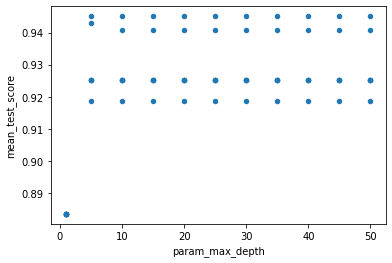

In [32]:
df.plot.scatter('param_max_depth', 'mean_test_score')

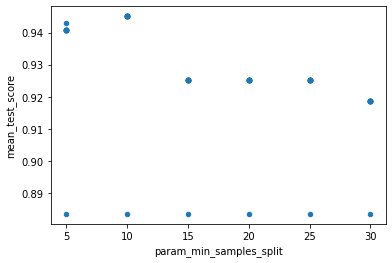

In [30]:
df.plot.scatter('param_min_samples_split', 'mean_test_score')